<a href="https://colab.research.google.com/github/K7S3/ML4NS-Project/blob/main/ML4NS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("SAMPL.csv")
data.head()

,iupac,smiles,expt,calc
0,"4-methoxy-N,N-dimethyl-benzamide",CN(C)C(=O)c1ccc(cc1)OC,-11.01,-9.625
1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219
2,3-methylbut-1-ene,CC(C)C=C,1.83,2.452
3,2-ethylpyrazine,CCc1cnccn1,-5.45,-5.809
4,heptan-1-ol,CCCCCCCO,-4.21,-2.917


In [3]:
data.size

2568

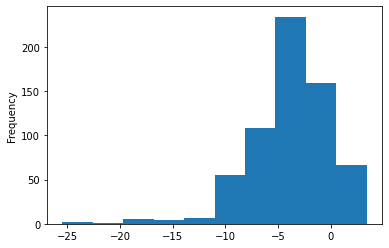

In [4]:
data['expt'].plot.hist()

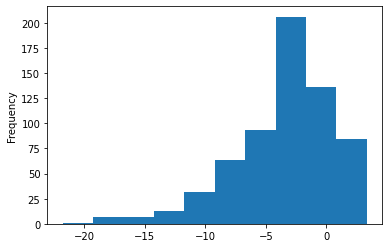

In [5]:
data['calc'].plot.hist()

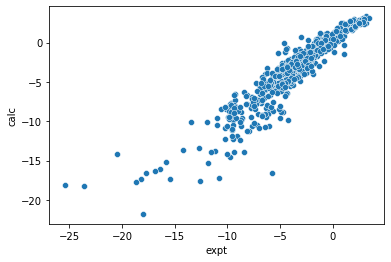

In [6]:
sns.scatterplot(x='expt', y='calc', data=data)

In [7]:
data['expt'].mean()

-3.8030062305295944

In [8]:
data['calc'].mean()

-3.4862227414330222

In [9]:
!pip3 install git+https://github.com/samoturk/mol2vec

  Cloning https://github.com/samoturk/mol2vec to /tmp/pip-req-build-3zc2adap
  Running command git clone -q https://github.com/samoturk/mol2vec /tmp/pip-req-build-3zc2adap
  Created wheel for mol2vec: filename=mol2vec-0.1-cp37-none-any.whl size=14028 sha256=d39edcaf20da0dc6253a3d40c997306770faa20f15c64342bfa0fdb3efec06d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-2oi8p35l/wheels/96/0f/2d/a1092b9677c96453dc244b209544cac61bc8b974cbffb50063
Successfully built mol2vec


In [10]:
!curl -L bit.ly/rdkit-colab | tar xz -C /

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   163  100   163    0     0   4939      0 --:--:-- --:--:-- --:--:--  4939
100   133  100   133    0     0   1127      0 --:--:-- --:--:-- --:--:--  1127
100   620  100   620    0     0   3212      0 --:--:-- --:--:-- --:--:--  605k
100 29.6M  100 29.6M    0     0  18.2M      0  0:00:01  0:00:01 --:--:-- 24.7M


In [12]:
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
from mol2vec.helpers import depict_identifier, plot_2D_vectors, IdentifierTable, mol_to_svg


In [13]:
from rdkit import Chem

In [16]:
aas = [Chem.MolFromSmiles(x) for x in data['smiles']]

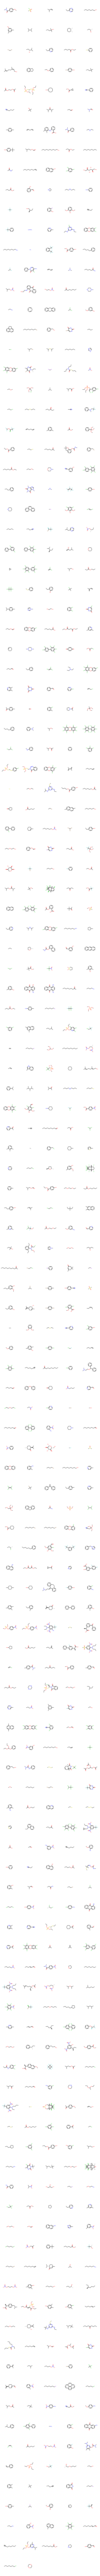

In [19]:
Chem.Draw.MolsToGridImage(aas, molsPerRow=5, useSVG=False)

In [20]:
sentence = mol2alt_sentence(aas[0], 1)
sentence

['2246728737',
 '3818546315',
 '848128881',
 '994637429',
 '2246728737',
 '3818546315',
 '2246699815',
 '1738265797',
 '864942730',
 '1510328189',
 '3217380708',
 '2994748777',
 '3218693969',
 '951226070',
 '3218693969',
 '951226070',
 '3217380708',
 '3162837314',
 '3218693969',
 '951226070',
 '3218693969',
 '951226070',
 '864674487',
 '2076190208',
 '2246728737',
 '3975275337']

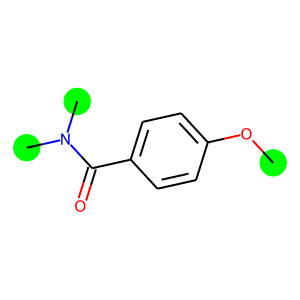

In [21]:
depict_identifier(aas[0], 2246728737, 1)


In [22]:
it = IdentifierTable(sentence, [aas[0]]*len(sentence), [sentence]*len(sentence), 5, 1)
it

In [23]:
from gensim.models import word2vec

In [30]:
!wget https://github.com/samoturk/mol2vec/raw/master/examples/models/model_300dim.pkl

--2021-04-14 04:58:36--  https://github.com/samoturk/mol2vec/raw/master/examples/models/model_300dim.pkl
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/samoturk/mol2vec/master/examples/models/model_300dim.pkl [following]
--2021-04-14 04:58:37--  https://raw.githubusercontent.com/samoturk/mol2vec/master/examples/models/model_300dim.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76786055 (73M) [application/octet-stream]
Saving to: ‘model_300dim.pkl’

model_300dim.pkl    100%[===================>]  73.23M  97.8MB/s    in 0.7s    

2021-04-14 04:58:37 (97.8 MB/s) - ‘model_300dim.pkl’ saved [76

In [32]:
model = word2vec.Word2Vec.load('model_300dim.pkl')

In [33]:
len(model.wv.vocab.keys())

21003

In [34]:
aa_sentences = [mol2alt_sentence(x, 1) for x in aas]
flat_list = [item for sublist in aa_sentences for item in sublist]
aa_identifiers_unique = set(flat_list)

In [35]:
df_vec = pd.DataFrame()
df_vec['identifier'] = list(aa_identifiers_unique)
df_vec.index = df_vec['identifier']

In [36]:
len(df_vec)

618